# Imports

In [9]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

plt.ion() # Turn on interactive mode on plots

# PyTorch imports
import torch

# Starting the environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='C:/Users/chris/git/deep-reinforcement-learning/p2_continuous-control/Reacher_Windows_x86_64/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# Environment Setup

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
#print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
#print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
#print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
#print('The state for the first agent looks like:', states[0])

# Agent Setup

In [4]:
# Auto load changes in the imported files
%load_ext autoreload
%autoreload 2

In [5]:
from agent import Agent

In [6]:
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent1 = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True, use_noise=True)

# Train the agent

In [7]:
def ddpg(agent, num_agents, n_episodes=1000, max_steps=1000):
    scores = []
    
    scores_window_100 = deque(maxlen=100)
    scores_window_40 = deque(maxlen=40)
    
    for episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        score = np.zeros(num_agents)
        agent.reset()
        
        for t in range(max_steps):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            score += rewards
            agent.step(states, actions, rewards, next_states, dones)

            
            states = next_states
            if np.any(dones):
                break
                
        scores_window_100.append(np.mean(score))
        scores_window_40.append(score)
        scores.append(np.mean(score))        
                
        if episode % (40 / 20) == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window_40)))
        
        if np.mean(scores_window_100)>=30.0:
            # Agent has reached target average score. Ending training
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_window_100)))
            torch.save(agent.actor_local.state_dict(), 'actor_model2.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_model2.pth')
            break
            
    return scores

In [8]:
scores1 = ddpg(agent1, num_agents)

Episode 2	Average Score: 0.95
Episode 4	Average Score: 0.77
Episode 6	Average Score: 0.72
Episode 8	Average Score: 0.71
Episode 10	Average Score: 0.67
Episode 12	Average Score: 0.62
Episode 14	Average Score: 0.56
Episode 16	Average Score: 0.58
Episode 18	Average Score: 0.66
Episode 20	Average Score: 0.75
Episode 22	Average Score: 0.87
Episode 24	Average Score: 0.95
Episode 26	Average Score: 0.98
Episode 28	Average Score: 1.04
Episode 30	Average Score: 1.08
Episode 32	Average Score: 1.14
Episode 34	Average Score: 1.21
Episode 36	Average Score: 1.34
Episode 38	Average Score: 1.53
Episode 40	Average Score: 1.72
Episode 42	Average Score: 1.96
Episode 44	Average Score: 2.25
Episode 46	Average Score: 2.59
Episode 48	Average Score: 2.96
Episode 50	Average Score: 3.45
Episode 52	Average Score: 4.00
Episode 54	Average Score: 4.69
Episode 56	Average Score: 5.41
Episode 58	Average Score: 6.13
Episode 60	Average Score: 6.89
Episode 62	Average Score: 7.74
Episode 64	Average Score: 8.70
Episode 66	A

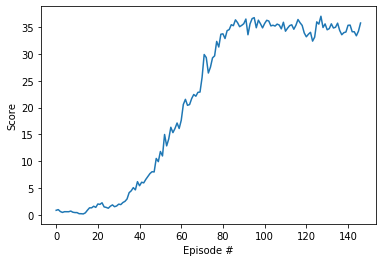

In [11]:
# plot the scores
Scores_plot = plt.figure()
ax = Scores_plot.add_subplot(111)
plt.plot(np.arange(len(scores1)), scores1)
plt.ylabel('Score')
plt.xlabel('Episode #')

#plt.savefig("Scores_plot.png")
plt.show()

In [12]:
with open('scores1.txt', 'w') as f:
    for item in scores1:
        f.write("%s\n" % item)

In [30]:
#torch.save(agent1.actor_local.state_dict(), 'actor_model.pth')
#torch.save(agent1.critic_local.state_dict(), 'critic_model.pth')

In [33]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations            # get the current state
score = np.zeros(num_agents)                                      # initialize the score
while True:
    actions = agent1.act(states)                   # select an action
    env_info = env.step(actions)[brain_name]        # send the action to the environment
    next_states = env_info.vector_observations   # get the next state
    rewards = env_info.rewards                  # get the reward
    dones = env_info.local_done                  # see if episode has finished
    score += rewards                                # update the score
    states = next_states                             # roll over the state to next time step
    if np.any(dones):                                       # exit loop if episode finished
        break
    
print("Score: {}".format(np.mean(score)))
print("Score vector")
print(score)
      

Score: 34.5349992280826
Score vector
[35.11999922 36.82999918 35.8599992  34.47999923 32.18999928 31.5199993
 34.06999924 37.76999916 34.37999923 28.79999936 36.83999918 38.69999913
 35.08999922 32.53999927 37.96999915 37.59999916 34.28999923 34.46999923
 27.06999939 35.10999922]


In [ ]:
agent2 = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=False, use_noise=False)
scores2 = ddpg(agent2, num_agents)

Episode 2	Average Score: 0.04
Episode 4	Average Score: 0.45
Episode 6	Average Score: 0.48
Episode 8	Average Score: 0.47
Episode 10	Average Score: 0.44
Episode 12	Average Score: 0.42
Episode 14	Average Score: 0.42
Episode 16	Average Score: 0.39
Episode 18	Average Score: 0.38
Episode 20	Average Score: 0.37
Episode 22	Average Score: 0.38
Episode 24	Average Score: 0.40
Episode 26	Average Score: 0.44
Episode 28	Average Score: 0.48
Episode 30	Average Score: 0.52
Episode 32	Average Score: 0.53
Episode 34	Average Score: 0.56
Episode 36	Average Score: 0.58
Episode 38	Average Score: 0.61
Episode 40	Average Score: 0.61
Episode 42	Average Score: 0.66
Episode 44	Average Score: 0.67
Episode 46	Average Score: 0.70
Episode 48	Average Score: 0.72
Episode 50	Average Score: 0.75
Episode 52	Average Score: 0.77
Episode 54	Average Score: 0.80
Episode 56	Average Score: 0.85
Episode 58	Average Score: 0.89
Episode 60	Average Score: 0.93
Episode 62	Average Score: 0.95
Episode 64	Average Score: 0.99
Episode 66	A

### Initialising agent from saved weights
Run the cell block below to load the pre-trained weights into the model.

In [15]:
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent_show = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True)
agent_show.actor_local.load_state_dict(torch.load('actor_model.pth'))
agent_show.actor_local.eval()
agent_show.critic_local.load_state_dict(torch.load('critic_model.pth'))
agent_show.critic_local.eval()

Critic(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=33, out_features=50, bias=True)
    (1): Linear(in_features=54, out_features=50, bias=True)
  )
  (output): Linear(in_features=50, out_features=1, bias=True)
)

In [16]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations            # get the current state
score = np.zeros(num_agents)                                      # initialize the score
while True:
    actions = agent_show.act(states)                   # select an action
    env_info = env.step(actions)[brain_name]        # send the action to the environment
    next_states = env_info.vector_observations   # get the next state
    rewards = env_info.rewards                  # get the reward
    dones = env_info.local_done                  # see if episode has finished
    score += rewards                                # update the score
    states = next_states                             # roll over the state to next time step
    if np.any(dones):                                       # exit loop if episode finished
        break
    
print("Score: {}".format(np.mean(score)))
print("Score vector")
print(score)

Score: 38.730499134305866
Score vector
[37.77999916 39.40999912 39.30999912 39.42999912 39.39999912 39.37999912
 39.17999912 39.48999912 38.35999914 38.27999914 39.51999912 38.77999913
 38.62999914 37.20999917 38.36999914 35.44999921 39.51999912 38.04999915
 39.67999911 39.37999912]
